# YAPAY ZEKA DERSİNDE ÖĞRENCİ BAŞARISI ANALİZİ 
### 1. Projenin Amacı
Bu çalışmanın amacı, Universiti Teknologi Malaysia (UTM) bünyesinde yürütülen bir **Yapay Zeka (YZ)** dersine katılan öğrencilerin akademik performanslarını etkileyen faktörleri incelemektir. Veri seti üzerinde **Keşifçi Veri Analizi (EDA)** yapılarak; öğrencilerin Quiz, Ödev ve Sınav notları arasındaki ilişkiler ortaya konulacak, eksik veriler kontrol edilecek ve başarı dağılımları görselleştirilecektir.

### 2. Veri Seti Hakkında (Data Description)
Bu çalışmada kullanılan veri seti, **Mendeley Data** akademik veri havuzundan temin edilmiştir.
* **Veri Seti Adı:** Student Performance Dataset in AI Course
* **Kaynak:** Mendeley Data (Elsevier)
* **Yayın Tarihi:** 20 Kasım 2025 (Version 2 - Güncel)
* **Format:** Tabular (.csv)
* **İçerik:** 521öğrenciye ait demografik bilgiler ve notlandırma verileri.
* **Orijinal Link:** [Mendeley Data Linki](https://data.mendeley.com/datasets/vzfyk22fhn/2)


### 1.Kütüphanelerin Yüklenmesi ve Veri Setinin Okunması

In [1]:
import pandas as pd             
import numpy as np              
import matplotlib.pyplot as plt 
import seaborn as sns           
import warnings                 

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot') 

print("Kütüphaneler başarıyla yüklendi.")


df = pd.read_csv("/kaggle/input/student-performance-dataset-in-ai-course/ai_student_performance.csv")
df.head()

Kütüphaneler başarıyla yüklendi.


,Student Id,Quiz_1,Midterm_1,Assignment_1,Assignment_2,Assignment_3,Project,Presentation,Final_Exam_Marks,Total,Grade,Categories
0,1,2.34,6.78,4.56,3.24,4.56,5.67,7.89,24.0,59.04,C+,Pass
1,2,8.17,12.43,2.87,1.87,2.89,2.34,2.34,29.0,61.91,B-,Pass
2,3,5.92,3.21,0.45,4.56,0.76,8.90,5.67,30.0,59.47,C+,Pass
3,4,1.45,9.87,3.12,2.34,3.01,1.23,1.23,33.0,55.25,C+,Pass
4,5,9.78,5.34,0.98,0.98,1.98,9.45,9.01,31.0,68.52,B,Distinction


### 2. Veriyi Tanıma (Data Understanding)
Veri setinin boyutu, sütun isimleri ve veri tipleri incelenerek genel yapısı anlaşılmaya çalışılmıştır.

In [2]:
print(f"Veri Seti Boyutu: {df.shape[0]} Satır, {df.shape[1]} Sütun")
print("-" * 30)

df.info()

display(df.describe().T)

Veri Seti Boyutu: 520 Satır, 12 Sütun
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student Id        520 non-null    int64  
 1   Quiz_1            520 non-null    float64
 2   Midterm_1         520 non-null    float64
 3   Assignment_1      520 non-null    float64
 4   Assignment_2      520 non-null    float64
 5   Assignment_3      520 non-null    float64
 6   Project           520 non-null    float64
 7   Presentation      520 non-null    float64
 8   Final_Exam_Marks  520 non-null    float64
 9   Total             520 non-null    float64
 10  Grade             520 non-null    object 
 11  Categories        520 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 48.9+ KB


,count,mean,std,min,25%,50%,75%,max
Student Id,520.0,260.500000,150.255338,1.00,130.7500,260.50,390.2500,520.00
Quiz_1,520.0,6.503635,2.152460,0.21,5.1200,6.67,8.4300,9.98
Midterm_1,520.0,8.532519,3.820372,0.12,5.4300,8.01,12.3625,15.00
Assignment_1,520.0,3.428885,0.911925,0.09,2.8900,3.56,4.1200,4.98
Assignment_2,520.0,3.616098,0.911483,0.21,3.2100,3.89,4.2300,4.98
Assignment_3,520.0,3.498385,0.909357,0.12,2.9800,3.67,4.1200,4.98
Project,520.0,6.879673,1.894361,0.21,5.5600,6.95,8.4500,9.98
Presentation,520.0,7.182154,1.818888,0.21,6.0100,7.34,8.6775,9.98
Final_Exam_Marks,520.0,31.431731,8.289712,4.00,30.0000,34.00,36.0000,39.50
Total,520.0,71.073079,12.643165,40.25,65.3175,72.15,79.0850,95.03


### 3. Eksik Veri Analizi (Missing Value Analysis)
Veri setinde analiz sonuçlarını etkileyecek boş (NaN) değer olup olmadığı kontrol edilmiştir. Eksik verilerin tespiti, modelin doğruluğu için kritiktir.

Sütunlardaki Eksik Veri Sayıları:

Student Id          0
Quiz_1              0
Midterm_1           0
Assignment_1        0
Assignment_2        0
Assignment_3        0
Project             0
Presentation        0
Final_Exam_Marks    0
Total               0
Grade               0
Categories          0
dtype: int64


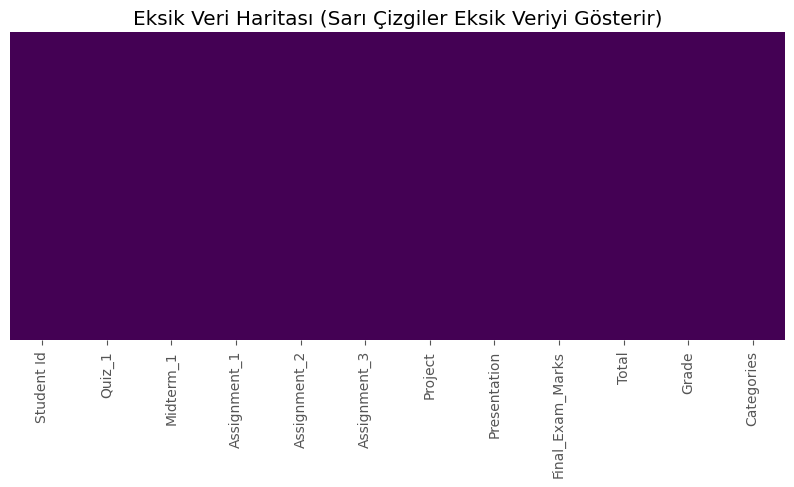

In [3]:
eksik_veri = df.isnull().sum()
print("Sütunlardaki Eksik Veri Sayıları:\n")
print(eksik_veri)


plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Eksik Veri Haritası (Sarı Çizgiler Eksik Veriyi Gösterir)')
plt.show()

### 4. Genel Başarı Durumu (Pass/Fail Analizi)
Sınıfın genel başarı tablosu incelenmiştir. Öğrencilerin dersi geçme (Pass/Distinction) veya kalma (Fail) durumları `Categories` değişkeni üzerinden analiz edilmiştir.

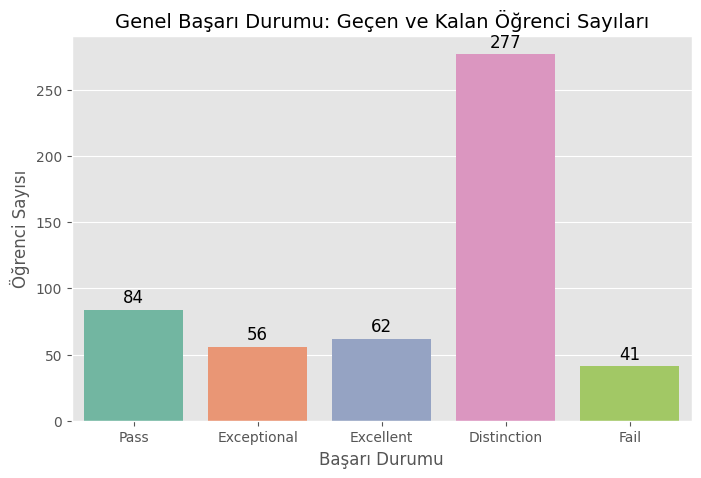

In [4]:
df['Categories'] = df['Categories'].str.strip()

category_order = ['Pass', 'Exceptional', 'Excellent', 'Distinction', 'Fail']

plt.figure(figsize=(8, 5))

ax = sns.countplot(data=df, x='Categories', palette='Set2', order=category_order)

plt.title('Genel Başarı Durumu: Geçen ve Kalan Öğrenci Sayıları', fontsize=14)
plt.xlabel('Başarı Durumu')
plt.ylabel('Öğrenci Sayısı')

for container in ax.containers:
    ax.bar_label(container, fontsize=12, padding=2)

plt.show()

### 5. Başarı Dağılımı ve Dengesizlik Analizi (Imbalance Check)
Öğrencilerin dersteki başarı durumlarını gösteren `Grade` (Harf Notu) sütununun dağılımı incelenmiştir. Verinin dengeli olup olmadığı bu aşamada belirlenir.

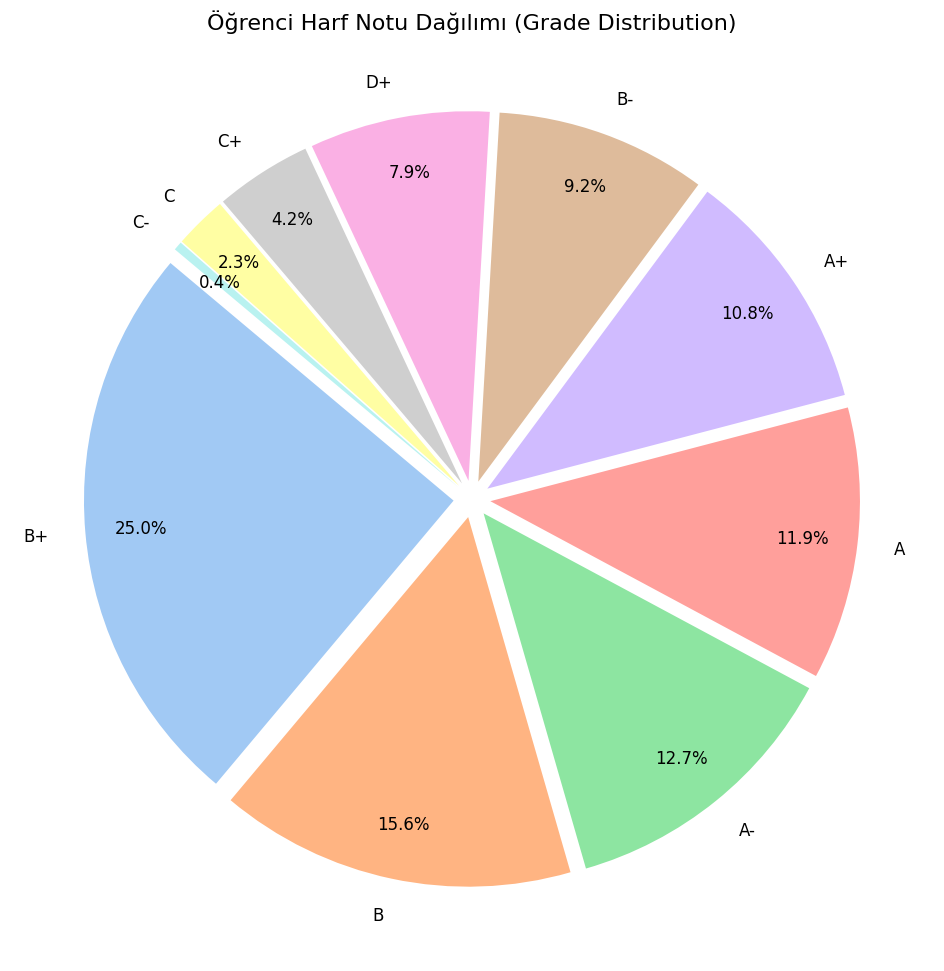

In [5]:
not_dagilimi = df['Grade'].value_counts()

plt.figure(figsize=(12, 12)) 

colors = sns.color_palette('pastel')[0:len(not_dagilimi)]

explode_list = [0.05] * len(not_dagilimi) 

plt.pie(
    not_dagilimi, 
    labels=not_dagilimi.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=explode_list,    
    pctdistance=0.85,        
    labeldistance=1.1,       
    textprops={'fontsize': 12} 
)

plt.title('Öğrenci Harf Notu Dağılımı (Grade Distribution)', fontsize=16)
plt.show()

> **Çıkarım:** Pasta grafiği incelendiğinde, öğrencilerin büyük çoğunluğunun **B+, B ve A** gibi başarılı notlar aldığı görülmektedir. Düşük notlar (C, D, F) azınlıktadır. Bu durum veri setinde **sınıf dengesizliği (class imbalance)** olduğunu gösterir; yani sınıfın genel başarı düzeyi yüksektir.

### 6. Özellikler Arasındaki İlişkiler (Correlation Analysis)
Vize, Quiz, Ödev ve Proje notlarının birbirleriyle ve yıl sonu notuyla (Total) olan ilişkisi incelenmiştir. Hangi çalışmanın başarıyı daha çok etkilediği bu matris ile görülmektedir.

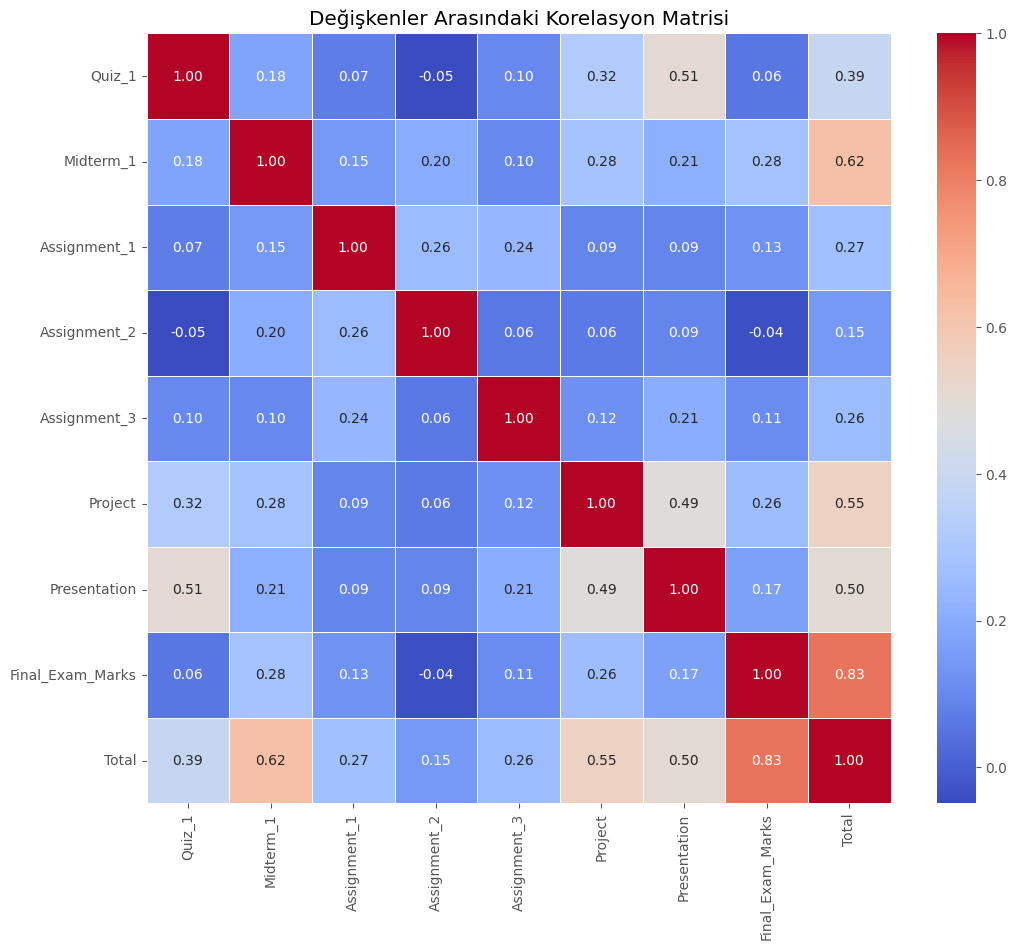

In [6]:
sayisal_veriler = df.select_dtypes(include=[np.number])

sayisal_veriler = sayisal_veriler.drop('Student Id', axis=1, errors='ignore')

plt.figure(figsize=(12, 10))
sns.heatmap(sayisal_veriler.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Değişkenler Arasındaki Korelasyon Matrisi')
plt.show()

> **Çıkarım:** Isı haritasına (Heatmap) göre;
> * **Final_Exam_Marks** (Final Notu) ile **Total** (Toplam Puan) arasında çok güçlü bir ilişki vardır.
> * **Midterm_1** (Vize) notları da genel başarıyı önemli ölçüde etkilemektedir.
> * Ödev ve projelerin başarıya etkisi pozitif olsa da sınavlar kadar belirleyici değildir.


# 7. Ders Bileşenlerinin Dağılım Analizi (FacetGrid)
Sınıfın genel not ortalamalarının (Quiz, Vize, Final,vb) nasıl dağıldığını görmek için daha gelişmiş bir görselleştirme tekniği olan **FacetGrid** kullanılmıştır.


In [ ]:
sayisal_cols = df.select_dtypes(include=[np.number]).columns
if 'Student Id' in sayisal_cols:
    sayisal_cols = sayisal_cols.drop('Student Id')


df_melted = df.melt(value_vars=sayisal_cols, var_name="Ders_Bileseni", value_name="Puan")


g = sns.FacetGrid(df_melted, col="Ders_Bileseni", col_wrap=3, height=4, aspect=1.2, sharex=False, sharey=False)


g.map(sns.histplot, "Puan", kde=True, color='#458B74', edgecolor='black')


g.fig.suptitle('Tüm Ders Bileşenlerinin Detaylı Dağılımı (FacetGrid)', y=1.02, fontsize=16)
plt.show()

> **Çikarım:**
> Yapılan dağılım analizi sonucunda ders bileşenleri hakkında şu kritik bulgulara ulaşılmıştır:
> 1.  **Final Sınavı (Final_Exam_Marks):** Dağılımın belirgin şekilde **sola çarpık (left-skewed)** olduğu görülmektedir. Öğrencilerin büyük çoğunluğu sınavdan yüksek puan (30-40 arası) almıştır. Bu durum, final sınavının öğrencilere nispeten kolay geldiğini veya sınıfın sınava iyi hazırlandığını gösterir.
> 2.  **Vize Sınavı (Midterm_1):** Finalin aksine, vize notları daha **dengeli (Normal Dağılıma yakın)** bir yayılım izlemektedir. Bu da vize sınavının, sınıfı başarılı ve başarısız olarak ayırt etmede (seçicilikte) finalden daha etkili olduğunu düşündürmektedir.
> 3.  **Ödevler ve Projeler:** Genellikle yüksek puanlarda yoğunlaşma (tepe noktası sağda) görülmektedir. Bu, öğrencilerin süreç odaklı görevlerde sınavlara kıyasla daha istikrarlı bir başarı gösterdiğini kanıtlar.

# 8. "Geri Dönüş Yapan" Öğrenciler (Comeback Analysis)
Bu bölümde veri setine daha derinlemesine bir bakış atarak şu soruyu cevaplamaya çalıştık: "Vize sınavı kötü geçen bir öğrenci, dönem sonunda yeterli toplam puanı toplayarak dersi geçebilir mi?"

Kriterler:

Düşük Vize: Vize notu (Midterm_1) 7.5 puanın altında (yani tam puanın %50'sinden az) olan öğrencileri filtreledik.

Başarı: Bu grupta olup, dersi Fail (Kaldı) dışında bir statüyle bitirenleri "Geri Dönüş Yapanlar" olarak tanımladık.

In [ ]:
# Vizesi düşük olanlar ve geri dönüş yapanları filtrele
low_midterm = df[df['Midterm_1'] < 7.5]
passed_comeback = low_midterm[low_midterm['Categories'] != 'Fail']

print(f"Vizesi düşük (<50%) olan öğrenci sayısı: {len(low_midterm)}")
print(f"Bunlardan dersi geçmeyi başaran 'Öğrenci' sayısı: {len(passed_comeback)}")

# Grafiği çiz (Y ekseni 'Total' olarak güncellendi)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Midterm_1', y='Total', hue='Categories', style='Categories', s=100)

# Vize baraj çizgisi
plt.axvline(x=7.5, color='red', linestyle='--', label='Vize %50 Sınırı')

plt.title('Vize vs Toplam Puan: Kimler Geri Dönüş Yaptı?')
plt.legend()
plt.show()

> **Çikarım:**
> Grafikte kırmızı çizginin solunda kalan (vizesi düşük) öğrencilerin büyük bir kısmının dersi geçebildiği görülmektedir. Bu bölgede yer alıp Y ekseninde (Toplam Puan) yukarı tırmanmayı başaran öğrencilerin oranı oldukça yüksektir.
>
>Sonuç: Vize notunun düşük olması kalmayı garantilemez; ancak dersi geçmek için dönem boyunca yapılan diğer çalışmalarda ve finalde gösterilen performansla toplamda ortalama 67.89 puan gibi bir seviyeye ulaşılması gerekmektedir.

### 9. Ders Bileşenlerinin Zorluk Analizi (Difficulty Comparison)

Dersin farklı bileşenleri (Quiz, Ödev, Sınav) farklı puan ağırlıklarına sahiptir (Örn: Final 40 puan, Ödev 5 puan). Öğrencilerin en çok hangi alanda zorlandığını tespit etmek için ham puanlar **Normalizasyon** işlemine tabi tutulmuş ve tüm bileşenler **100'lük sistem** üzerinden eşitlenmiştir.

Bu analiz, dersin en zorlayıcı ve en yüksek başarı gösterilen kısımlarını ortaya koyar.

In [ ]:
max_scores = {
    'Quiz_1': 10, 'Midterm_1': 15, 'Assignment_1': 5, 
    'Assignment_2': 5, 'Assignment_3': 5, 'Project': 10, 
    'Presentation': 10, 'Final_Exam_Marks': 40
}

df_norm = pd.DataFrame()
for col, max_val in max_scores.items():
    df_norm[col] = (df[col] / max_val) * 100

df_norm_melted = df_norm.melt(var_name='Ders_Bileseni', value_name='Basari_Yuzdesi')

plt.figure(figsize=(14, 7))

sirali_index = df_norm.mean().sort_values().index

sns.boxplot(data=df_norm_melted, x='Ders_Bileseni', y='Basari_Yuzdesi', order=sirali_index, palette='RdYlGn')

plt.title('Ders Bileşenlerinin Zorluk Dağılımı (100 Üzerinden Puanlar)', fontsize=15)
plt.ylabel('Başarı Puanı (0-100)')
plt.xlabel('Ders Bileşenleri')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.show()

> **Çikarım:**
> Kutusu en aşağıda olan ders bileşeni, öğrencilerin en çok zorlandığı kısımdır."

## 10. Sonuç ve Değerlendirme
Bu çalışmada, Universiti Teknologi Malaysia (UTM) kaynaklı "ai_öğrenci_performansı" veri seti üzerinde kapsamlı bir Keşifçi Veri Analizi (EDA) gerçekleştirilmiştir. 520 öğrenciye ait veriler; eksik veri analizi, korelasyon incelemesi ve başarı dağılımı görselleştirmeleri ile irdelenmiş ve aşağıdaki temel sonuçlara ulaşılmıştır:

**1.Veri Yapısı ve Bütünlüğü:** Veri seti 520 satır ve ilişkili özniteliklerden oluşmaktadır. Yapılan isnull() kontrolü ve ısı haritası (heatmap) incelemesi sonucunda veri setinin temiz olduğu ve eksik veri (missing value) içermediği doğrulanmıştır. Bu durum, analizin güvenilirliğini artırmaktadır.

**2. Başarı Faktörlerinin İlişkisi (Korelasyon Analizi):** Değişkenler arasındaki ilişkiyi gösteren Korelasyon Matrisi incelendiğinde;

Öğrencinin yıl sonu başarı notunu en güçlü şekilde etkileyen değişkenin Final Sınavı olduğu görülmüştür.

Bunu takiben Vize Sınavı (Midterm) ve Projeler, başarı üzerinde en belirleyici diğer faktörlerdir.

Quiz ve ödevlerin başarı ile korelasyonu pozitif olmakla birlikte, sınavlar kadar belirleyici olmadığı saptanmıştır.

*3.* **Ders Bileşenlerinin Zorluk Dereceleri**(Normalizasyon Analizi)*:**Tüm puan türlerinin 100'lük sisteme normalize edilerek karşılaştırıldığı Boxplot analizi çarpıcı bir bulguyu ortaya koymuştur:

Öğrenciler Ödev, Sunum ve Proje gibi süreç odaklı çalışmalarda daha yüksek puan ortalamalarına sahiptir.

En düşük başarı ortalaması ve en yüksek varyans (değişkenlik) Final Sınavı bileşeninde görülmüştür. Bu durum, dersin en zorlayıcı kısmının teorik sınavlar olduğunu göstermektedir.

**4. Başarı Geri Dönüşü (Resilience Analysis):** vize sınavında sınıf ortalamasının veya barajın altında (Midterm < 7.5) kalmasına rağmen dersi geçmeyi başaran bir öğrenci grubu ("Savaşçılar") tespit edilmiştir. Bu bulgu, dönem başında başarısız olan öğrencilerin, final ve proje performanslarını artırarak dersi başarıyla tamamlayabildiklerini kanıtlamaktadır.

Genel Değerlendirme: Analiz sonuçları, Yapay Zeka dersinde öğrencilerin pratik uygulamalarda (proje/ödev) teorik sınavlara göre daha yetkin olduğunu göstermektedir. 
Gelecek dönemlerde başarıyı artırmak adına, vize sınavı düşük olan öğrencilere yönelik erken uyarı sistemleri geliştirilmeli ve teorik kavramların pekiştirilmesine ağırlık verilmelidir.